## Linear Regression
### sklearn.linear_model.LinearRegression: 
#### (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression)

#### Example: 1

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])  # y = 2* x_0 + 3 * x_1 + 3
y = np.dot(X, np.array([2, 3])) + 5
reg = LinearRegression().fit(X, y)
# reg.score(X, y)

In [2]:
X.shape

(4, 2)

In [3]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [4]:
np.array([1, 2]).shape

(2,)

In [5]:
reg.coef_

array([2., 3.])

In [6]:
reg.intercept_

5.0

In [7]:
reg.predict(np.array([[3, 5]]))

array([26.])

C:\Users\Dr. Bhavesh Dharmani\AppData\Local\Temp\ipykernel_18204\3708466155.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  surf = ax.scatter(X[:,0], X[:, 1], y, cmap='viridis', edgecolor='none')


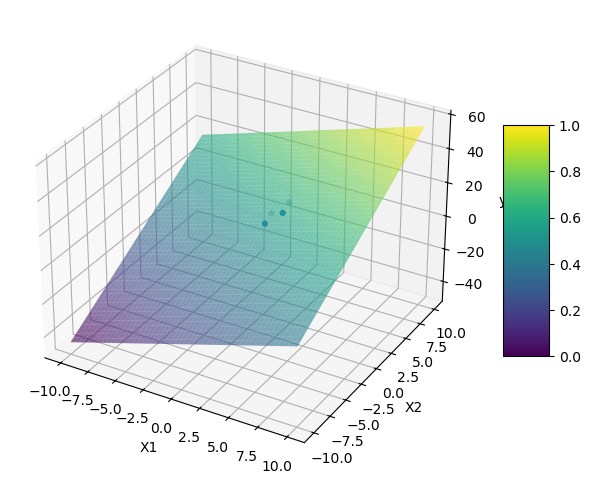

In [14]:
# plt.plot2d(X, np.dot(X, reg.coef_ ) + reg.intercept_ , linewidth=1)
# # plt.axhline(0.5, color=".5")

# Create 3D plot
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.scatter(X[:,0], X[:, 1], y, cmap='viridis', edgecolor='none')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# On the same plot show the regression line

# Define coefficients
coef = np.array([2., 3.])
intercept = 5.0

# Create grid for x1 and x2
x1p = np.linspace(-10, 10, 50)
x2p = np.linspace(-10, 10, 50)
X1p, X2p = np.meshgrid(x1p, x2p)

# Compute y values for the plane
Yp = coef[0]*X1p + coef[1]*X2p + intercept

# Plot
ax.plot_surface(X1p, X2p, Yp, alpha=0.6, cmap='viridis')

plt.show()


In [15]:
X_test = np.linspace(-5, 5, 100)
# X_test

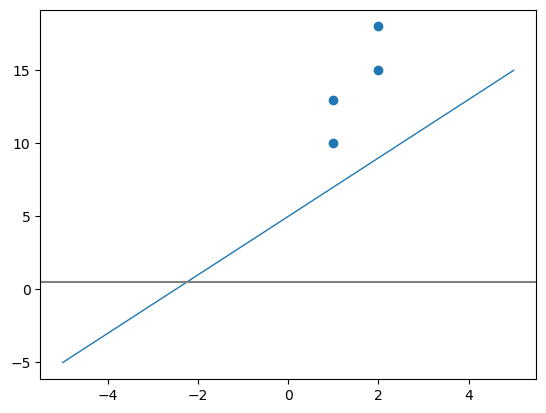

In [16]:
plt.scatter(X[:,0], y)
plt.plot(X_test, np.dot(X_test, reg.coef_[0] ) + reg.intercept_ , linewidth=1)
plt.axhline(0.5, color=".5")

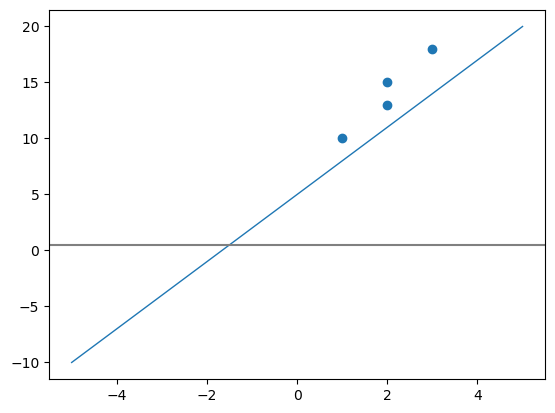

In [17]:
plt.scatter(X[:,1], y)
plt.plot(X_test, np.dot(X_test, reg.coef_[1] ) + reg.intercept_ , linewidth=1)
plt.axhline(0.5, color=".5")

#### Example 2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the diabetes dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes = datasets.load_diabetes(return_X_y=False)

In [7]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [16]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [17]:
diabetes_X.shape

(442, 10)

In [18]:
diabetes_y.shape

(442,)

In [19]:
# print(diabetes.DESCR)

In [20]:
diabetes_X[0:4][1:10]

array([[-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191]])

In [21]:
dummy = diabetes_X[0]
dummy  #[1:5]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [22]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X.shape 

(442, 1)

In [23]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


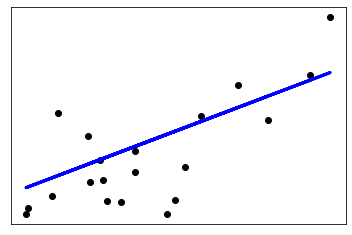

In [26]:
# # Split the data into training/testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# # Create linear regression object
# regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()